In [ ]:
#This version is broken - the optimization packages do not like the integer nature of the parametrized Grover
#I determined that this excersize in progamming Optimizable, OOP QAlgorithms had run its usefulness  

In [1]:
import pennylane as qml 
from pennylane import qchem
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [1]:
#Defining an algorithm class for Grover search
#This class will have addded functionality to optimize the number of calls to the oracle to experimentally verify the optimal value of sqrt(n)

class Grover:
#------------
#    INITIALIZATION, Input number of qubits, shots, and the bit string to be marked for search
#------------    
    def __init__(self, qubits, shots, oracle_state):
        #num of qubits
        self.qubits = qubits
        #num of shots on backend
        self.shots = shots
        
        #marked state defining the oracle - input in the form of an integer
        #integer is converted to bit string which is converted to binary vector for later use in FlipState method
        self.num = oracle_state
        if oracle_state >= 2**self.qubits:
            raise ValueError(f"Insufficient qubits. Input value less than {2**self.qubits}")
        v = []
        B = bin(oracle_state)[2:].zfill(self.qubits)
        for i in range(len(B)):
            v.append(int(B[i]))
        self.oracle = v
        
        #optimal number of oracle+diffuser cycles - this value is used as the default to reproduce the standard Grover search
        self.cycles = int(np.floor(np.sqrt(self.qubits)))

        #-----------
        #
        # TRYING TO DEFINE QNODE AS CLASS ATRIBUTE
        #
        #-----------
        self.dev = qml.device("default.qubit", wires = self.qubits, shots = self.shots)
        self.qnode = qml.QNode(self.circuit, self.dev, interface="autograd")
#------------
#    CIRCUIT METHOD, This is the core method which is used as input to all other methods
#    Default run uses the optimal number of oracle cycles
#    User can specify alternate number of cycles if desired
#------------    
    def circuit(self, cycles = None):
        #cycles is an optional input if the user wants to implement Grover with a nonstandard number of oracle calls
        if cycles is None:
            cycles = self.cycles
        #the run method takes in an integer to define the number of cycles - during optimization a tensor is passed to run - this converts the tensor input to one the method can use
        #if type(cycles) == np.tensor:
        #    cycles = int(np.floor(cycles.item()))
        elif type(cycles) != int:
            cycles = int(np.floor(cycles))
        
        
        #setup for Grover algorithm with initial state [1,1,...,1] (this is more optimal as the diffuser does not need to be conjugated by x gates)
        initial_state = []
        for i in range(self.qubits):
            initial_state.append(1)
            
        #oracle+diffusion
        def OD():
        #oracle
            qml.FlipSign(self.oracle, wires = range(self.qubits))
        #diffusion
            for i in range(self.qubits):
                qml.Hadamard(i)
            qml.FlipSign(initial_state, wires = range(self.qubits))
            for i in range(self.qubits):
                qml.Hadamard(i)
                
        #repeater oracle+diffuser 
        def Oracle_Diffusion(n):
            for i in range(int(n)):
                OD()
                
    #run grover
        def G(x):
        #initial state prep
            for i in range(self.qubits):
                qml.PauliX(i)
                qml.Hadamard(i)
        #repeated component
            Oracle_Diffusion(x)
        #measurement
            return qml.probs(wires = range(self.qubits))
        #the output of the method is a 1D tensor of probabilities for each bit string given the number of cycles specified
        return (G(cycles))
    
#------------
#    RUN METHOD
#    Default run uses the optimal number of oracle cycles
#    User can specify alternate number of cycles if desired
#------------  
    
    #runs the circuit through the qnode
    def run(self, cycles = None):
        return self.qnode(cycles)
    
    #encodes the output of the circuit into a cost function
    def cost(self, cycles = None):
        return -self.qnode(cycles)[self.num]
#------------
#    PLOT METHOD, visualizes probabilities outputted by run method
#    Default run uses the optimal number of oracle cycles
#    User can specify alternate number of cycles if desired
#------------    
    
    def plot(self, cycles = None):
        #same as for run
        if cycles is None:
            cycles = self.cycles
        elif type(cycles) != int:
            cycles = int(np.floor(cycles))
            
        #store y values as output of run method
        y = self.run(cycles)
        bit_strings = [f"{x:0{self.qubits}b}" for x in range(len(y))]
        plt.bar(bit_strings, y, color = "#212121")
        plt.xticks(rotation="vertical")
        plt.xlabel("State label")
        plt.ylabel("Probability Amplitude")
        plt.title("States probabilities amplitudes")
        plt.show()
        
#------------
#    OPT METHOD, utilizes cycle input capability to experimentally recover optimal number of cycles
#------------          
    def opt(self):
        #initialize optimizer using integer step size as cycles must always be an integer
        opt = qml.GradientDescentOptimizer(stepsize=1)
        #initialize training parameter
        #def cost(x):
        #    return -self.run(x)[self.num]
        theta = np.array(0.0, requires_grad=True)
        #sends theta -> run method and selects the amplitude of marked state from output tensor
        #value is negative to permit minimization
        Cost_vec = [self.cost(theta)]
        cycle = [theta]
    
        max_iterations = 10
        #convergence_tolerance = 1e-06
    
        for n in range(max_iterations):
            #BROKEN LINE - step and cost does not appear to be working with this settup
            #theta = opt.step(self.cost, theta)
            #theta, prev_cost = opt.step_and_cost(self.cost, theta)
            
            #store subsequent optimization steps in the corresponding vectors
            Cost_vec.append(self.cost(theta+n))
            cycle.append(theta+n)
            
            #convergence condition left over from VQE demo where opt code was first sourced - doesn't apply to this problem
            #conv = np.abs(Prob[-1] - prev_prob)
              
        #print(f"Step = {Cost_vec.index(max(Cost_vec))}, probability = {max(Cost_vec):.8f}")
        n_cost = [Cost_vec.index(min(Cost_vec)), min(Cost_vec)]
        #print(f"Step = {Cost_vec.index(min(Cost_vec))}, probability = {min(Cost_vec):.8f}") 
        return n_cost

In [2]:
G = Grover(3, 1000, 2)
#theta = np.array(0.0, requires_grad=True)
#Prob = [G.run(theta)[0]]
#angle = [theta]

NameError: name 'np' is not defined

In [4]:
theta = np.array(0.0, requires_grad=True)
for i in range(10)

    Cost_vec.append(G. = [G.cost(theta)]
print(Cost_vec)

SyntaxError: invalid syntax (2470098486.py, line 2)

In [4]:
G.opt()[0]

7

In [ ]:
y = []
x = []

for i in range(1, 14):
    G = Grover(i, 100, 0)
    y.append(G.opt()[0])
    x.append(i)
    #print(i)


Text(0.5, 0, 'qubit number')

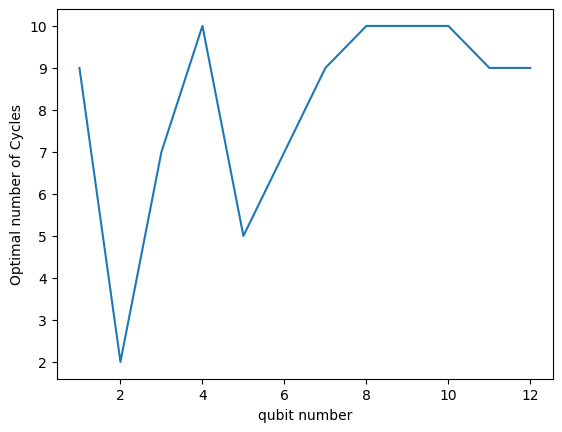

In [6]:
plt.plot(x,y)
plt.ylabel('Optimal number of Cycles')
plt.xlabel('qubit number')